In [2]:
// First set of cleaning
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data = pd.read_csv ('member_sample.csv', index_col = 0)

In [3]:
nulls = data.isnull().sum()
type (nulls)
nulls.count ()

112

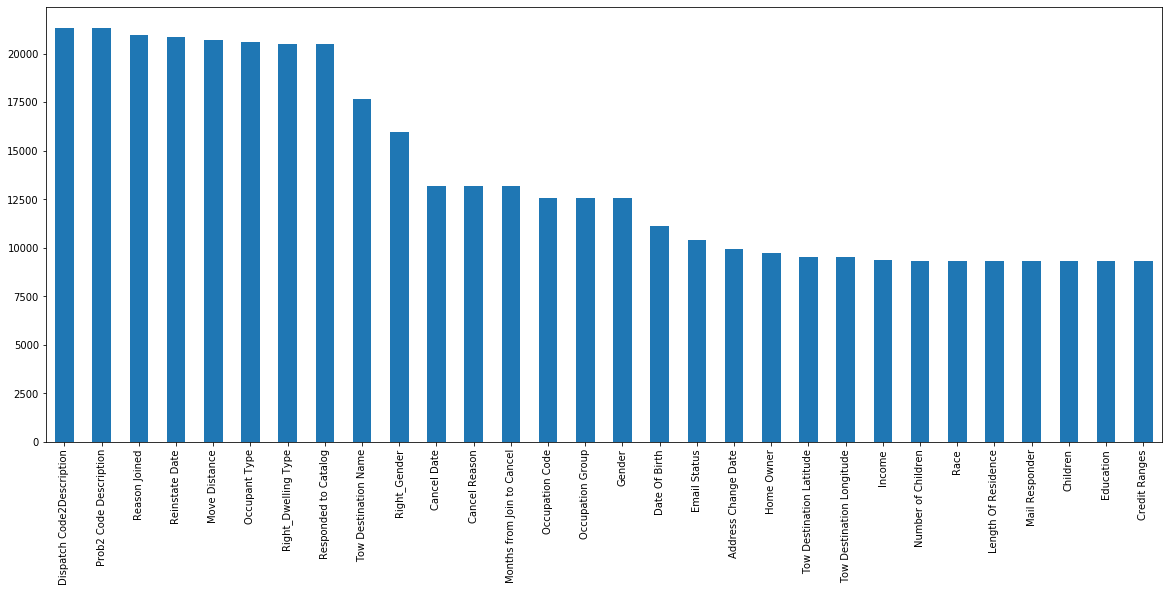

In [4]:
nulls.nlargest (30).plot (kind = 'bar', figsize = (20, 8))
#We can fill in missing value with K nearest neighbors

In [5]:
data ['Reason Joined'].head ()


0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: Reason Joined, dtype: object

In [6]:
data ['Reason Joined'].value_counts()

U                      168
Dependable Services    127
5                       45
Family Plan Avail       19
Nation Wide Rd Srv       7
Gift Membership          5
Free Membership          4
3                        3
Club Reputation          3
Other                    1
Recommend/Referral       1
Variety of Services      1
Direct Mail              1
Convenient Offices       1
7                        1
Prior Family Exp         1
Name: Reason Joined, dtype: int64

In [7]:
dependable_service_group = data .loc [data ['Reason Joined']  == 'Dependable Services']
everyone_else = data.loc [data ['Reason Joined'] != 'Dependable Services']

In [8]:
dependable_service_group.info ()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127 entries, 633 to 89877
Columns: 112 entries, Individual Key to Was Towed To AAR Referral
dtypes: float64(35), object(77)
memory usage: 112.1+ KB


In [9]:
everyone_else.info ()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21217 entries, 0 to 99998
Columns: 112 entries, Individual Key to Was Towed To AAR Referral
dtypes: float64(35), object(77)
memory usage: 18.3+ MB


In [10]:
cost_cols = ['ERS ENT Count Year 1', 'ERS ENT Count Year 2', 'ERS ENT Count Year 3']
            
data.loc [:, cost_cols]

ERS ENT Count Year 1  ERS ENT Count Year 2  ERS ENT Count Year 3
0                       NaN                   NaN                   NaN
1                       0.0                   0.0                   2.0
2                       0.0                   0.0                   2.0
3                       0.0                   0.0                   2.0
4                       0.0                   0.0                   2.0
...                     ...                   ...                   ...
99994                   1.0                   0.0                   3.0
99995                   1.0                   0.0                   3.0
99996                   2.0                   0.0                   3.0
99997                   2.0                   0.0                   3.0
99998                   2.0                   0.0                   3.0

[21344 rows x 3 columns]

In [11]:
data .iloc [17:20].loc [:, cost_cols]

ERS ENT Count Year 1  ERS ENT Count Year 2  ERS ENT Count Year 3
17                   0.0                   0.0                   0.0
18                   0.0                   0.0                   0.0
19                   0.0                   0.0                   0.0

In [12]:
data.iloc [17:20].loc [:, ['Individual Key', 'Household Key'] +cost_cols]

Individual Key  Household Key  ERS ENT Count Year 1  ERS ENT Count Year 2  \
17       2766868.0     11622991.0                   0.0                   0.0   
18       2766868.0     11622991.0                   0.0                   0.0   
19       2766868.0     11622991.0                   0.0                   0.0   

    ERS ENT Count Year 3  
17                   0.0  
18                   0.0  
19                   0.0

In [21]:
data.loc[data['Household Key'] == 11622991.0, cost_cols + ['Call Status Recv Date','Plus Cost', 'Premier Cost']]

ERS ENT Count Year 1  ERS ENT Count Year 2  ERS ENT Count Year 3  \
11                   1.0                   2.0                   0.0   
12                   1.0                   2.0                   0.0   
13                   1.0                   2.0                   0.0   
14                   NaN                   NaN                   NaN   
15                   NaN                   NaN                   NaN   
16                   0.0                   0.0                   0.0   
17                   0.0                   0.0                   0.0   
18                   0.0                   0.0                   0.0   
19                   0.0                   0.0                   0.0   

   Call Status Recv Date  Plus Cost  Premier Cost  
11   2019-05-10 18:48:01        0.0           0.0  
12   2015-03-20 08:24:14        0.0           0.0  
13   2016-04-25 12:26:29        0.0           0.0  
14                   NaN        NaN           NaN  
15                   NaN        NaN           NaN  
16   2015-02-03 12:30:28        0.0           0.0  
17   2015-02-10 12:08:14        0.0           0.0  
18   2015-02-23 12:04:37        0.0           0.0  
19   2016-06-11 17:59:05        0.0           0.0

In [24]:
data['Date'] = pd.to_datetime(data['Call Status Recv Date'])
data['Date'].dt.year.value_counts()

2015.0    3842
2016.0    3482
2014.0    2233
2019.0    2108
2017.0    1141
2018.0    1038
1899.0     106
Name: Date, dtype: int64

In [25]:
data['Date'] = pd.to_datetime(data['SC Date'])
data['Date'].dt.year.value_counts()

2015.0    3851
2016.0    3551
2014.0    2242
2019.0    2151
2017.0    1160
2018.0    1042
Name: Date, dtype: int64

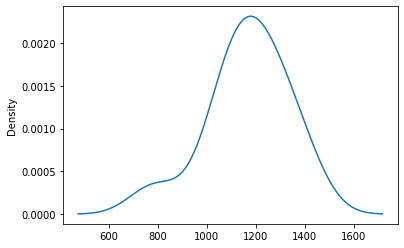

In [26]:
data['Date'] = pd.to_datetime(data['SC Date'])
data['Date'].dt.month.value_counts().plot (kind = 'density')

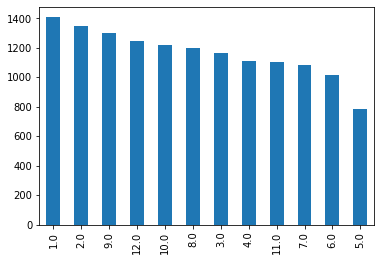

In [27]:
data['Date'].dt.month.value_counts().plot (kind = 'bar')

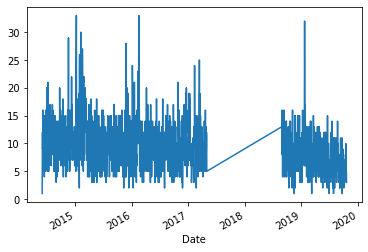

In [29]:
data.groupby('Date').size().plot()

In [32]:
data ['Reason Joined'].fillna('unknown', inplace = True)
data['Reason Joined'].value_counts()

unknown                20956
U                        168
Dependable Services      127
5                         45
Family Plan Avail         19
Nation Wide Rd Srv         7
Gift Membership            5
Free Membership            4
3                          3
Club Reputation            3
Recommend/Referral         1
Direct Mail                1
Convenient Offices         1
7                          1
Other                      1
Prior Family Exp           1
Variety of Services        1
Name: Reason Joined, dtype: int64

In [33]:
dependable_service_group = data.loc[data['Reason Joined'] == 'Dependable Services']
everyone_else = data.loc[data['Reason Joined'] != 'Dependable Services']
dependable_service_group.info ()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127 entries, 633 to 89877
Columns: 113 entries, Individual Key to Date
dtypes: datetime64[ns](1), float64(35), object(77)
memory usage: 113.1+ KB


In [34]:
everyone_else.info ()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21217 entries, 0 to 99998
Columns: 113 entries, Individual Key to Date
dtypes: datetime64[ns](1), float64(35), object(77)
memory usage: 19.1+ MB


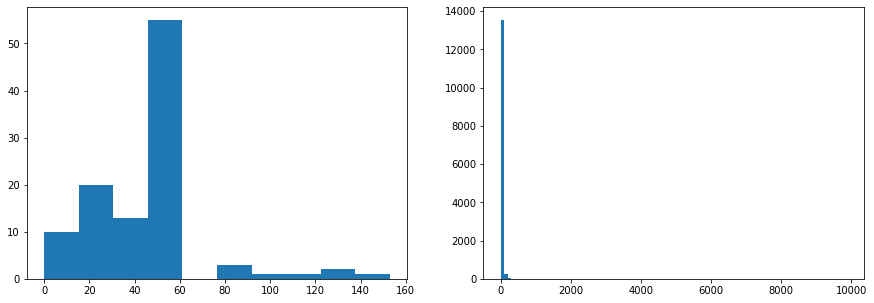

In [35]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))
ax[0].hist(dependable_service_group['Total Cost']);
ax[1].hist(everyone_else['Total Cost'], bins = 100);

(0, 160)

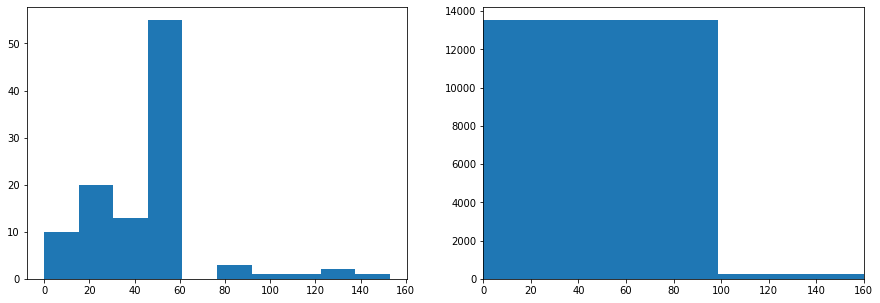

In [37]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))
ax[0].hist(dependable_service_group['Total Cost']);
ax[1].hist(everyone_else['Total Cost'], bins = 100);
ax[1].set_xlim(0,160)

In [39]:
#Impute missing values
#Categorize >200 100->200 70->100 
data['Income'].value_counts()

100-149,999      2577
90-99,999        2400
70-79,999        1000
50-59,999         888
40-49,999         771
10-19,999         688
175 - 199,999     600
30-39,999         553
60-69,999         541
150 - 174,999     438
20-29,999         425
200 - 249,999     424
250K+             397
Under 10K         226
80-89,999          15
Name: Income, dtype: int64

In [41]:
data['Income'].fillna('unknown', inplace = True)
data['Income'].value_counts()

unknown          9401
100-149,999      2577
90-99,999        2400
70-79,999        1000
50-59,999         888
40-49,999         771
10-19,999         688
175 - 199,999     600
30-39,999         553
60-69,999         541
150 - 174,999     438
20-29,999         425
200 - 249,999     424
250K+             397
Under 10K         226
80-89,999          15
Name: Income, dtype: int64

In [43]:
data['Home Owner'].value_counts()

Home Owner             11121
Renter                   491
Probable Renter           10
Probable Home Owner        7
Name: Home Owner, dtype: int64

In [50]:
data[['Tow Destination Latitude', 'Tow Destination Longitude']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21344 entries, 0 to 99998
Data columns (total 2 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Tow Destination Latitude   11813 non-null  float64
 1   Tow Destination Longitude  11813 non-null  float64
dtypes: float64(2)
memory usage: 1.1 MB


In [62]:
lat_long = data[['Tow Destination Latitude', 'Tow Destination Longitude', 'Total Cost']].dropna().iloc[:40]
# import folium  
# m = folium.Map(location = loc_1)
# m
# loc_1 = lat_long.iloc[0]
# def add_marker(x):
#     folium.CircleMarker(location = [x[0],[x1], radius = x[2]/10).add_to(m)
# lat_long.apply(add_marker, axis=1)



UsageError: Line magic function `%import` not found.


In [55]:
data.groupby('Household Key')[['Tow Destination Latitude', 'Tow Destination Longitude']].max()

Tow Destination Latitude  Tow Destination Longitude
Household Key                                                     
875.0                          41.00000                        0.0
969.0                          42.00000                        0.0
3338.0                              NaN                        NaN
8718.0                              NaN                        NaN
11524.0                        41.76090                        0.0
...                                 ...                        ...
100069201.0                    41.00000                        0.0
100070004.0                    41.00000                      -71.0
100071861.0                    41.74463                        0.0
100071870.0                    41.00000                        0.0
100079136.0                    41.40000                        0.0

[5241 rows x 2 columns]

In [42]:
def yes_noer (x):
    if x == 'Y':
        return 1
    elif x == 'N':
        return 0
    else:
        return np.nan

In [45]:
#Car loan
data['FSV CMSI Flag'] = data['FSV CMSI Flag'].apply(yes_noer)
data['FSV CMSI Flag'].value_counts()


Series([], Name: FSV CMSI Flag, dtype: int64)

In [69]:
# 54 min: Clustering based on Total Cost and Vehicle Model Name
from sklearn.cluster import KMeans
X = data [['Total Cost', 'SC Vehicle Model Name']].dropna()

Total Cost SC Vehicle Model Name
1           32.50                 CAMRY
2           30.00                 CAMRY
3           32.50                 CAMRY
4           30.00                 CAMRY
5           53.00                 CAMRY
...           ...                   ...
99993       53.00                   V70
99994       36.00                   V70
99995       53.00                   V70
99996       58.85             ECONOLINE
99997       58.85                SONATA

[13936 rows x 2 columns]

In [74]:
from sklearn.cluster import KMeans
X = pd.get_dummies(data [['Total Cost', 'SC Vehicle Model Name']].dropna())
kmeans = KMeans(n_clusters = 4)
kmeans.fit(X)
X['label'] = kmeans.labels_
X.head()




Total Cost  SC Vehicle Model Name_118I  SC Vehicle Model Name_135I  \
1        32.5                           0                           0   
2        30.0                           0                           0   
3        32.5                           0                           0   
4        30.0                           0                           0   
5        53.0                           0                           0   

   SC Vehicle Model Name_140  SC Vehicle Model Name_150  \
1                          0                          0   
2                          0                          0   
3                          0                          0   
4                          0                          0   
5                          0                          0   

   SC Vehicle Model Name_1500  SC Vehicle Model Name_155  \
1                           0                          0   
2                           0                          0   
3                           0                          0   
4                           0                          0   
5                           0                          0   

   SC Vehicle Model Name_190D  SC Vehicle Model Name_2  \
1                           0                        0   
2                           0                        0   
3                           0                        0   
4                           0                        0   
5                           0                        0   

   SC Vehicle Model Name_200  ...  SC Vehicle Model Name_YUKON  \
1                          0  ...                            0   
2                          0  ...                            0   
3                          0  ...                            0   
4                          0  ...                            0   
5                          0  ...                            0   

   SC Vehicle Model Name_YUKON XL  SC Vehicle Model Name_YUKON XL 1500  \
1                               0                                    0   
2                               0                                    0   
3                               0                                    0   
4                               0                                    0   
5                               0                                    0   

   SC Vehicle Model Name_YUKON XL 2500  SC Vehicle Model Name_Yukon XL 1500  \
1                                    0                                    0   
2                                    0                                    0   
3                                    0                                    0   
4                                    0                                    0   
5                                    0                                    0   

   SC Vehicle Model Name_Z3  SC Vehicle Model Name_Z4  \
1                         0                         0   
2                         0                         0   
3                         0                         0   
4                         0                         0   
5                         0                         0   

   SC Vehicle Model Name_ZEPHYR  SC Vehicle Model Name_murano  label  
1                             0                             0      0  
2                             0                             0      0  
3                             0                             0      0  
4                             0                             0      0  
5                             0                             0      3  

[5 rows x 787 columns]

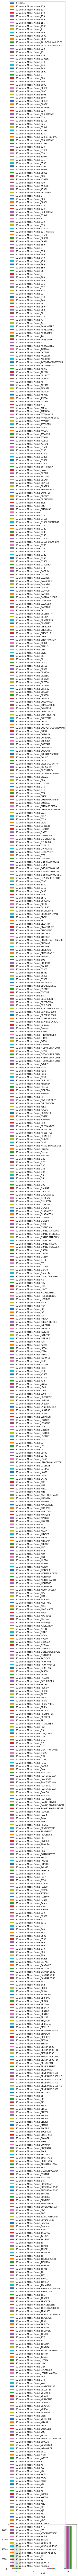

In [75]:
X.groupby('label').count().plot(kind = 'bar')

In [76]:
X = pd.get_dummies(data [['Total Cost', 'SC Vehicle Manufacturer Name']].dropna())
kmeans = KMeans(n_clusters = 4)
kmeans.fit(X)
X['label'] = kmeans.labels_
X.head()

Total Cost  SC Vehicle Manufacturer Name_ACURA  \
1        32.5                                   0   
2        30.0                                   0   
3        32.5                                   0   
4        30.0                                   0   
5        53.0                                   0   

   SC Vehicle Manufacturer Name_ALFA ROMEO  \
1                                        0   
2                                        0   
3                                        0   
4                                        0   
5                                        0   

   SC Vehicle Manufacturer Name_AMERICAN AUSTIN  \
1                                             0   
2                                             0   
3                                             0   
4                                             0   
5                                             0   

   SC Vehicle Manufacturer Name_APRILIA  SC Vehicle Manufacturer Name_AUDI  \
1                                     0                                  0   
2                                     0                                  0   
3                                     0                                  0   
4                                     0                                  0   
5                                     0                                  0   

   SC Vehicle Manufacturer Name_AUSTIN HEALEY  \
1                                           0   
2                                           0   
3                                           0   
4                                           0   
5                                           0   

   SC Vehicle Manufacturer Name_Audi  SC Vehicle Manufacturer Name_BICYCLE  \
1                                  0                                     0   
2                                  0                                     0   
3                                  0                                     0   
4                                  0                                     0   
5                                  0                                     0   

   SC Vehicle Manufacturer Name_BMW  ...  \
1                                 0  ...   
2                                 0  ...   
3                                 0  ...   
4                                 0  ...   
5                                 0  ...   

   SC Vehicle Manufacturer Name_TRIUMPH  SC Vehicle Manufacturer Name_Toyota  \
1                                     0                                    0   
2                                     0                                    0   
3                                     0                                    0   
4                                     0                                    0   
5                                     0                                    0   

   SC Vehicle Manufacturer Name_UNK  SC Vehicle Manufacturer Name_VOLKSWAGEN  \
1                                 0                                        0   
2                                 0                                        0   
3                                 0                                        0   
4                                 0                                        0   
5                                 0                                        0   

   SC Vehicle Manufacturer Name_VOLKSWAGON  \
1                                        0   
2                                        0   
3                                        0   
4                                        0   
5                                        0   

   SC Vehicle Manufacturer Name_VOLVO  \
1                                   0   
2                                   0   
3                                   0   
4                                   0   
5                                   0   

   SC Vehicle Manufacturer Name_Volkswagen  \
1                                        0   
2                       

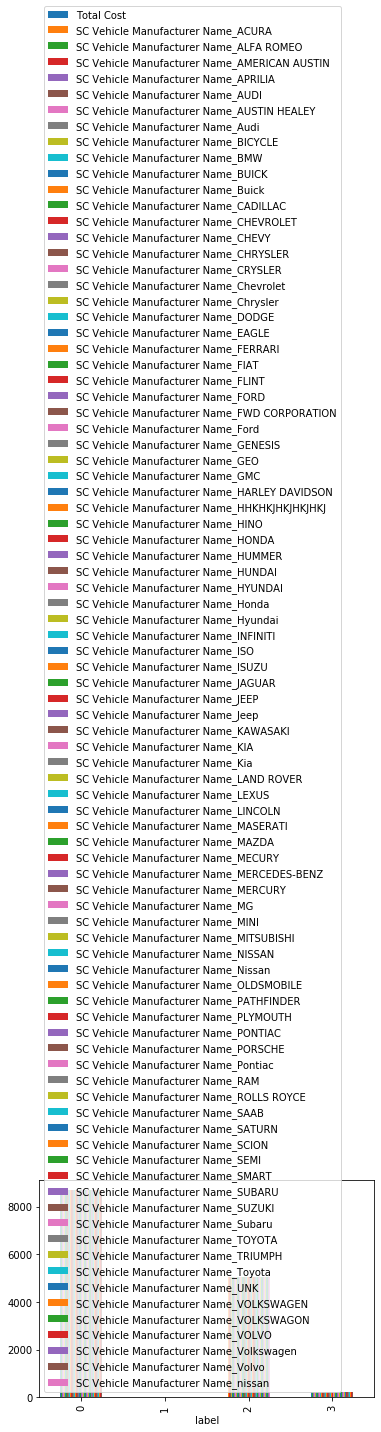

In [77]:
X.groupby('label').count().plot(kind = 'bar')

In [79]:
X.groupby('label').mean().iloc[1].sort_values()

SC Vehicle Manufacturer Name_JEEP                  0.0
SC Vehicle Manufacturer Name_PATHFINDER            0.0
SC Vehicle Manufacturer Name_OLDSMOBILE            0.0
SC Vehicle Manufacturer Name_Nissan                0.0
SC Vehicle Manufacturer Name_NISSAN                0.0
                                                 ...  
SC Vehicle Manufacturer Name_FORD                  0.0
SC Vehicle Manufacturer Name_FLINT                 0.0
SC Vehicle Manufacturer Name_HHKHKJHKJHKJHKJ       0.0
SC Vehicle Manufacturer Name_HONDA                 1.0
Total Cost                                      9869.0
Name: 1, Length: 87, dtype: float64

In [ ]:
# Look for patterns for cost and product purchases
# Some cars seem to be engaging with the mortgage payment?
# Then building a classifier, regressor and doing the clustering
# Plus Cost and Premier Cost columns specify the kind of ownership
# We fill missing data with the mean or drop the missing data. It depends. Explore using KNN, sometimes make more sense to predict values
